# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejmplo encajaría muy bien una regresión lineal.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../día_1/salary_data.csv')
print(df.shape)
df.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

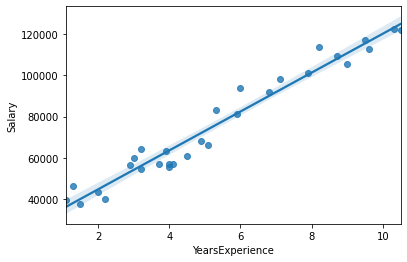

In [2]:
#my_solution: 
#sns.regplot(x=df.iloc[:,0], y=df.iloc[:,1]);

#TEacher_solution
sns.regplot(data=df, x='YearsExperience', y='Salary')

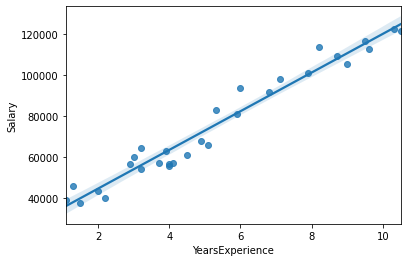

El problema es que en la vida real, los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [3]:
df = df = pd.read_csv('../día_1/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
#para la regresión Polinomica, con ciertos algoritmos necesitas usar para el modelo 'numpy.array', de ahí que utilicemos '.values'

X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Si no quisieramos 'intercept' cambiaríamos el parámetro a 'fit_intercept=False' 

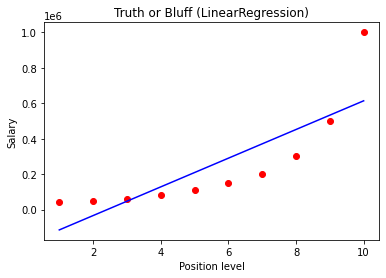

In [7]:

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='r')
    plt.plot(X, lin_reg.predict(X), color= 'b')
    plt.title('Truth or Bluff (LinearRegression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

viz_linear()


Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias. Si degree = 3 y tenemos dos features (a, b), realizará a^2, b^2, a^3, b^3, ab, a^2b, ab^2

(a al cuadrado, b al cuadrado, a al cubo, b al cubo, a por b, a al cuadrado por b, a por b al cuadrado)

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
# PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X) #Ajusta a los parámetros del Objeto PolinomialFeatures, en este caso
X_poly = poly_reg.transform(X)

In [10]:
X_poly

#X_poly es una Matríz: 
# columna_0 = valor(X)**0, valor_X elevado a cero'0'. Para contemplar el valor del 'intercept'==> es 'omega0' == temino independiente 
# columna_1 = valor_X **1
# columna_2 = valor_X **2 
# columna_3 = valor_X **3, valor_X elevado al cubo

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [11]:
# regresión lineal

pol_reg = LinearRegression([[5.5]]) 
#Acordarse de introducir en el parametro de la predicción np.array()
pol_reg.fit(X_poly, y)

#Aquí incluimos en x, los pesos de la matriz polinómica

LinearRegression(copy_X=True, fit_intercept=[[5.5]], n_jobs=None,
                 normalize=False)

In [20]:
X.shape, (pol_reg.predict(poly_reg.transform(X))).shape

((10, 1), (10,))

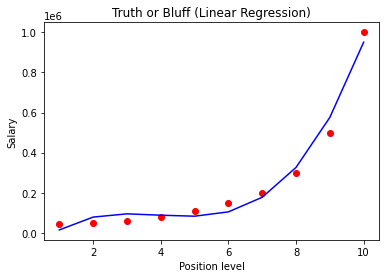

In [14]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X,y,color='red')
    plt.plot(X, pol_reg.predict(poly_reg.transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [16]:
pol_reg.predict(poly_reg.transform(X)), X

(array([ 14902.0979021 ,  78759.9067599 ,  94960.37296037,  88223.77622377,
         83270.39627039, 104820.51282051, 177594.40559441, 326312.35431236,
        575694.63869464, 950461.53846154]), array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64))

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [14]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [16]:
# transformamos 5.5, que es el dato nuevo de categoría==> a predecir su salario
poly_reg.transform([[5.5]])

array([[  1.   ,   5.5  ,  30.25 , 166.375]])

In [17]:
# predecimos 5.5
print("Predicción salario con la Regresión Lineal:",lin_reg.predict([[5.5]]))
#Acordarse de introducir en el parametro de la predicción en np.array()

print("Predicción salario con la Regresión Polinómica:",pol_reg.predict(poly_reg.transform([[5.5]])))

Predicción salario con la Regresión Lineal: [249500.]
Predicción salario con la Regresión Polinómica: [89187.5]
